In [2]:
using Random, Distributions, Statistics, Plots

In [3]:
function iterative_sampling(t::Int, σ::Float64, μ::Float64=5.0, max_steps::Int=100)
    means = Float64[]

    values = rand(Normal(μ, σ), t)
    mean_value = mean(values)
    push!(means, mean_value)

    for step in 2:max_steps
        new_values = Vector{Float64}(undef, t)
        
        for i in 1:t
            x = rand(Normal(μ, σ))
            history = Float64[]
            
            for k in reverse(1:length(means))
                push!(history, x)
                if x >= means[k]
                    break
                end
                x = rand(Normal(μ, σ))
            end
            
            new_values[i] = history[end]
        end

        mean_value = mean(new_values)
        push!(means, mean_value)

    end

    return means
end

iterative_sampling (generic function with 3 methods)

In [4]:
t = 100000
σ = 2.0
max_steps = 100

means = iterative_sampling(t, 2.0, 5.0, max_steps)

println("Średnie wartości w kolejnych krokach:")
println(means)


Średnie wartości w kolejnych krokach:
[5.007602923988506, 5.00158401704232, 5.797708045540361, 6.264178816094514, 6.590089622130785, 6.824364679839022, 7.023850614032629, 7.187938517281275, 7.324270868537172, 7.4403162805500855, 7.552958482221973, 7.644548450794883, 7.7417066117752205, 7.81652839583301, 7.875755878842848, 7.953476231218662, 8.013616694755708, 8.07788054409174, 8.125528008350784, 8.171670638784041, 8.222224734172094, 8.274734572027167, 8.319288691292957, 8.34702480088436, 8.396278434049085, 8.431552102011866, 8.463505474240874, 8.493415705824965, 8.526805953256705, 8.564093989385832, 8.588478411350488, 8.618637265060125, 8.6541436106201, 8.67336176994624, 8.699836822818726, 8.726553809073476, 8.749677260342601, 8.780913593230423, 8.794803744082396, 8.817363072693059, 8.838339018570531, 8.860902977687099, 8.880840957617648, 8.904514885426565, 8.92007428938036, 8.939479411634789, 8.960241119089213, 8.979589494570789, 8.991874569040238, 9.009288291913505, 9.028695039231144

In [16]:
function EV_total(means::Vector{Float64}, σ::Float64, μ::Float64=5.0, t::Int=10000)
    n = length(means)
    total_sum = 0.0
    total_sum_n = 0.0

    for _ in 1:t
        x = rand(Normal(μ, σ))
        for i in n:-1:1
            if x > means[i] || i == 1
                total_sum += x
                total_sum_n+=i
                break
            end
            x = rand(Normal(μ, σ))
        end
    end

    return total_sum / t, total_sum_n/t
end
EV_total(means,σ)

(9.607080811134786, 54.1017)

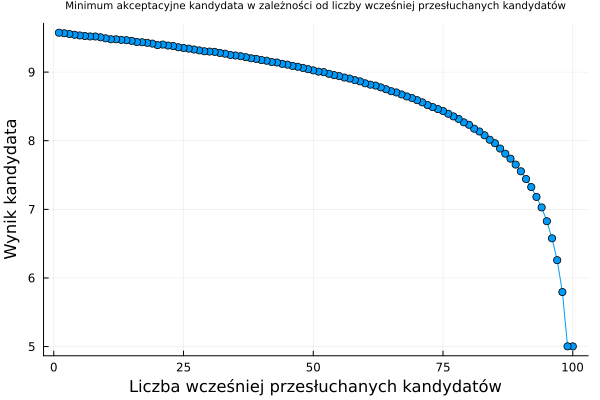

In [5]:
plot(reverse(1:length(means)), means, marker=:circle, xlabel="Liczba wcześniej przesłuchanych kandydatów", ylabel="Wynik kandydata", title="Minimum akceptacyjne kandydata w zależności od liczby wcześniej przesłuchanych kandydatów", legend=false,titlefontsize=7)